# Online algorithm

## 1 Defining lib, path, param

In [1]:
import sys
sys.path.insert(0, "..")

import scipy.signal

from im_processing_fct.functions import *

## 2 Matching elements generation

### 2.1 Background

#### 2.1.1 Read first frame

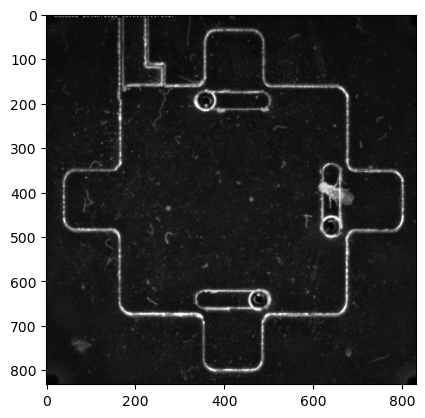

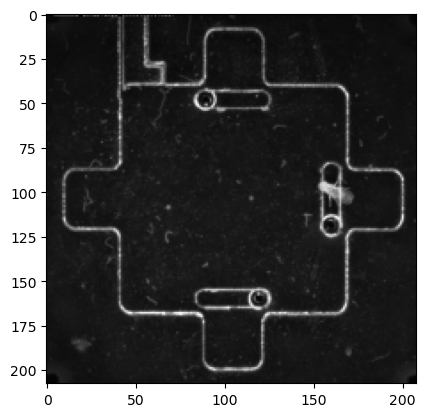

In [2]:
vidcap = cv2.VideoCapture(vid_dir_path.joinpath("vid0_vid0_p0-0_40fps.mp4").as_posix())
for i in range(1):
    success,im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1]/rescaling_factor), 
                                       int(im_full_gray.shape[0]/rescaling_factor)), 
                            interpolation = cv2.INTER_AREA)

plt.figure()
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)

### 2.1.2 Generating background

795983.0
751975.0
746531.0
743395.0


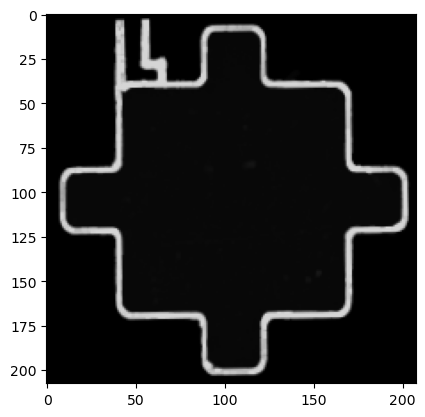

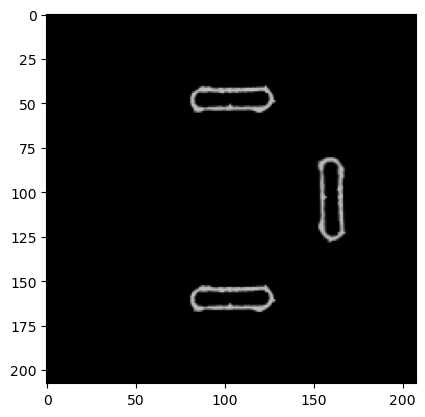

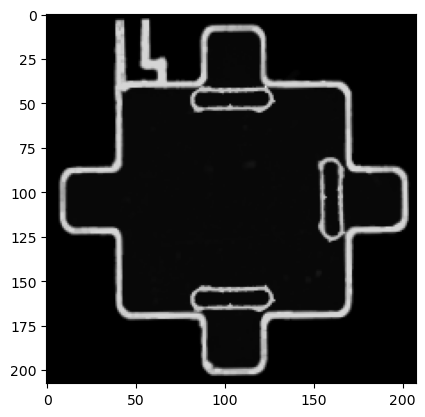

In [3]:
res_val = math.inf
for i in range(10):
    background_arena_door_temp, background_rails_temp, background_full_temp = gen_background(im_full_gray_resized)
    
    im_gray_resized_bg_full_sub = cv2.subtract(im_full_gray_resized, background_full_temp)
    if (res_val > cv2.sumElems(im_gray_resized_bg_full_sub)[0]):
        res_val = cv2.sumElems(im_gray_resized_bg_full_sub)[0]
        print(res_val)
        background_full = background_full_temp.copy()
        background_arena_door = background_arena_door_temp.copy()
        background_rails = background_rails_temp.copy()
    
    success,im_full = vidcap.read()
    im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)
    im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1]/rescaling_factor), 
                                      int(im_full_gray.shape[0]/rescaling_factor)), 
                                      interpolation = cv2.INTER_AREA)



plt.figure()
plt.imshow(background_arena_door, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(background_rails, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(background_full, cmap='gray', vmin=0, vmax=255)

### 2.2 Balls

#### 2.2.1 Read image

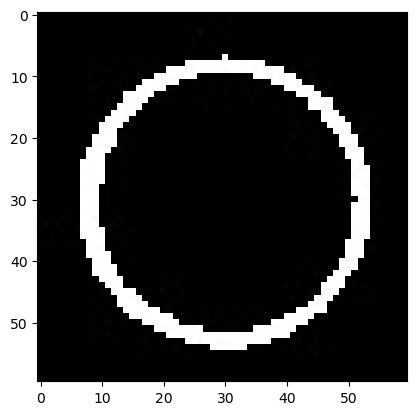

In [5]:
im_ball = cv2.imread(im_fg_dir_path.joinpath("im_ball.jpg").as_posix())
im_ball_gray = cv2.cvtColor(im_ball, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_ball_gray, cmap='gray', vmin=0, vmax=255)

#### 2.2.2 Rescale and binary

-10.0


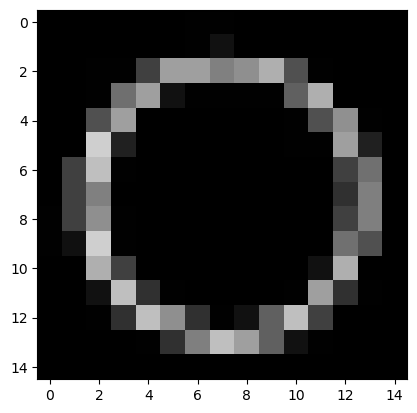

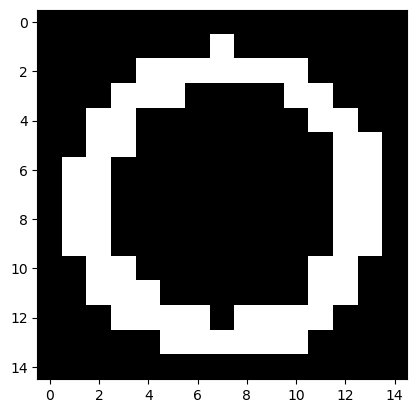

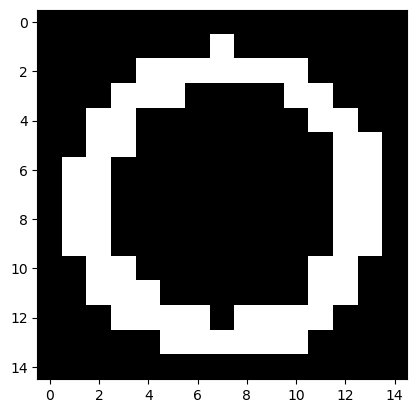

In [6]:
im_ball_gray_resized = cv2.resize(im_ball_gray, (int(im_ball_gray.shape[1]/rescaling_factor), 
                                                 int(im_ball_gray.shape[0]/rescaling_factor)), 
                                                 interpolation = cv2.INTER_AREA)

plt.figure()
plt.imshow(im_ball_gray_resized, cmap='gray', vmin=0, vmax=255)

_, im_ball_gray_resized_bin = cv2.threshold(im_ball_gray_resized,10,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(im_ball_gray_resized_bin, cmap='gray', vmin=0, vmax=255)

im_ball_filter = np.array(im_ball_gray_resized_bin.copy(), float)

#im_ball_filter = np.zeros(im_ball_gray_resized_bin.shape)

#im_ball_filter = cv2.circle(im_ball_filter, (7, 7), 5, 255, 1)

plt.figure()
plt.imshow(im_ball_filter, cmap='gray', vmin=0, vmax=255)

im_ball_filter[im_ball_filter==0]= -10
print(im_ball_filter.min())

im_ball_filter = im_ball_filter/(15**2)/255

## 3 Online 

### 3.1 Ouput videos

In [8]:
fps = 40
out_bg_sub = cv2.VideoWriter(save_data_path.joinpath('bg_sub.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_otsu = cv2.VideoWriter(save_data_path.joinpath('otsu.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_otsu_ero = cv2.VideoWriter(save_data_path.joinpath('otsu_ero.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_otsu_ball = cv2.VideoWriter(save_data_path.joinpath('otsu_ball.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_val_cont = cv2.VideoWriter(save_data_path.joinpath('val_cont.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_ero = cv2.VideoWriter(save_data_path.joinpath('ero.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_dil = cv2.VideoWriter(save_data_path.joinpath('dil.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)
out_anot = cv2.VideoWriter(save_data_path.joinpath('anot.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]))
out_fly = cv2.VideoWriter(save_data_path.joinpath('fly.mp4').as_posix(), cv2.VideoWriter_fourcc(*'mp4v'), fps, (im_full_gray_resized.shape[0], im_full_gray_resized.shape[1]), 0)

### 3.2 Image processing

In [9]:
comput_time = []
count = 0
while count < 500:
    success,im = vidcap.read()
    count += 1
    if success:
        start_time = time.time()
        im_resized = cv2.resize(im, (int(im_full_gray.shape[1]/rescaling_factor), 
                                          int(im_full_gray.shape[0]/rescaling_factor)), 
                                          interpolation = cv2.INTER_AREA)
        
        #background substraction
        im_full_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1]/rescaling_factor), 
                                          int(im_full_gray.shape[0]/rescaling_factor)), 
                                          interpolation = cv2.INTER_AREA)
        
        im_full_gray_resized_bg_ad_rm = cv2.subtract(im_full_gray_resized, background_arena_door)
        im_full_gray_resized_bg_full_rm = cv2.subtract(im_full_gray_resized, background_full)
        
        #suppress numbers at the top
        im_full_gray_resized_bg_ad_rm [0:10][:]=0
        im_full_gray_resized_bg_full_rm [0:10][:]=0
        out_bg_sub.write(im_full_gray_resized_bg_full_rm)

        #otsu thresholding
        _, im_full_gray_resized_bg_ad_rm_otsu = cv2.threshold(im_full_gray_resized_bg_ad_rm,0,255,
                                                              cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        _, im_full_gray_resized_bg_full_rm_otsu = cv2.threshold(im_full_gray_resized_bg_full_rm,0,255,
                                                                cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        out_otsu.write(im_full_gray_resized_bg_full_rm_otsu)
        
        #finding balls
        balls_center = []
        dst = cv2.filter2D(im_full_gray_resized_bg_ad_rm_otsu, -1, im_ball_filter) 
        
        max_idx = np.unravel_index(np.argmax(dst), dst.shape)
        balls_center.append(max_idx)

        for i in range(nb_balls-1):
            dst[max_idx[0]-20:max_idx[0]+20, max_idx[1]-20:max_idx[1]+20] = 0
            #plt.figure()
            #plt.imshow(dst)
            max_idx = np.unravel_index(np.argmax(dst), dst.shape)
            balls_center.append(max_idx)
            #print(max_idx)
            
        im_full_gray_resized_balls = im_resized.copy()
        for center in balls_center:
            im_full_gray_resized_balls = cv2.circle(im_full_gray_resized_balls, (center[1], center[0]), 5, 
                                                    (255,0,0), cv2.FILLED)
            
        #subtracting balls
        ball_radius = 8
        for center in balls_center:
            #print(center[1], center[0])
            im_full_gray_resized_bg_full_rm_otsu[center[0]-ball_radius:center[0]+ball_radius, 
                                                 center[1]-ball_radius:center[1]+ball_radius] = 0
            
        #closing image once background removed (closes fly across rails)
        kernel_closing = np.ones((4,4), np.uint8)
        im_full_gray_resized_bg_full_rm_otsu_dil = cv2.dilate(im_full_gray_resized_bg_full_rm_otsu, kernel_closing, iterations = 1)
        im_full_gray_resized_bg_full_rm_otsu_closed = cv2.erode(im_full_gray_resized_bg_full_rm_otsu_dil, kernel_closing, iterations = 1)
        out_otsu_ball.write(im_full_gray_resized_bg_full_rm_otsu_closed)
       
        #eroding with kernels to remove non compact struct. (edges of the plate to which the magnet is glued)
        kernel_ero = np.array([[0,0,1,0,0],
                           [0,0,1,0,0],
                           [1,1,1,1,1],
                           [0,0,1,0,0],
                           [0,0,1,0,0]], np.uint8)
        im_full_gray_resized_bg_full_rm_otsu_ero = cv2.erode(im_full_gray_resized_bg_full_rm_otsu_closed, kernel_ero, iterations = 1)
        
        #same principle for remaining struct.
        kernel_ero_small = np.array([[0,1,0],
                           [1,1,1],
                           [0,1,0]], np.uint8)
        im_full_gray_resized_bg_full_rm_otsu_ero = cv2.erode(im_full_gray_resized_bg_full_rm_otsu_ero, kernel_ero_small, iterations = 1)
    
        out_otsu_ero.write(im_full_gray_resized_bg_full_rm_otsu_ero)
        
        #finding contours
        mask_all_contours_full = np.zeros(im_full_gray_resized_bg_full_rm_otsu_closed.shape)
        im_otsu_contours_full, hierarchy = cv2.findContours(image= im_full_gray_resized_bg_full_rm_otsu_ero, 
                                                          mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[-2:]
        mask_all_contours_full = cv2.drawContours(image=mask_all_contours_full, contours=im_otsu_contours_full, contourIdx=-1, 
                                             color=1, thickness=cv2.FILLED, lineType=cv2.LINE_AA)
        
        valid_contours_full = [] #just for debugging (chacking video)
        fly_contour = []
        fly_contour_length = 0
        
        #only length criteria for now (could add area, convexity, ...)
        for contour in im_otsu_contours_full:
            valid_contours_full.append(contour)
            if len(contour) > 15 and len(contour) > fly_contour_length: 
                fly_contour = contour
                fly_contour_length = len(contour)
                
                    
        
        mask_valid_contours_full = np.zeros(im_full_gray_resized_bg_full_rm_otsu.shape)
        mask_valid_contours_full = cv2.drawContours(image=mask_valid_contours_full, contours=valid_contours_full, contourIdx=-1, 
                                                  color=255, thickness=cv2.FILLED, lineType=cv2.LINE_AA)
        mask_valid_contours_full = np.array(mask_valid_contours_full, np.uint8)
        out_val_cont.write(mask_valid_contours_full)
        
        #finding and annotating fly's centroid
        im_full_gray_resized_anot = im_full_gray_resized_balls.copy()
        mask_fly = np.zeros(im_full_gray_resized_bg_full_rm_otsu.shape, np.uint8)
        if (len(fly_contour)):
            mask_fly = cv2.drawContours(image=mask_fly, contours=[fly_contour], contourIdx=-1, 
                                                  color=255, thickness=cv2.FILLED, lineType=cv2.LINE_AA)
            cx,cy,alpha = compute_centroid_angle(mask_fly)
            im_full_gray_resized_anot = cv2.circle(im_full_gray_resized_balls, (cx, cy), 3, 
                                                    (0,0,255), cv2.FILLED)
        
        out_fly.write(mask_fly) 
        
        out_anot.write(im_full_gray_resized_anot)
        
        comput_time.append(time.time()-start_time)

print(np.mean(comput_time))
print(1/np.mean(comput_time))
out_bg_sub.release()      
out_otsu.release()  
out_otsu_ero.release()
out_otsu_ball.release()  
out_val_cont.release()
out_ero.release()        
out_dil.release()
out_anot.release()
out_fly.release()

print(count)

0.005362574100494385
186.47760968147895
500
